# General Overview

   Streaming services have proven themselves worthy competitors against the long-standing "gatekeepers of film" - movie theaters. These competitors are alike in that they provide similar products and their goal is to make money, but a distinct difference between their business models is the WAY they make money. Movies at the theater make money through ticket sales, a one time payment in exchange for a one time expereince of the product. Streaming services make their money through subscriptions, a monthly payments that allows the viewer unlimited access to the product(s). One service is an event; a performance 

# Business Understanding

   This distinction is important to understand when analyzing the success of a particular film. It is easy to determine the success of a movie in the theater. All one must do is compare the budget of the film to the total amount of money the film grossed. Ticket sales provides you with a concrete answer to the question, "Was my film a success?" Streaming services however, are more complicated.    
   Streamers pay a subscription in exchange for access to the collective hub of films owned by the company. As such, it is far more difficult to directly relate a specific movie to the services' success. We cannot compare the budget of the film to the total grossed, because there is not variable, like tickets, to measure the total grossed. Subscriptions are the key as they are the source of income. So, we ask ourselves, "How do we entice people to sign up for our service?" To answer this question, we will use data from both the TMDB and TN databases to analyze:
    1. How does a films budget affect its overall succes?
    2. What have been the most popular genres?
    3. When should the movies release date be? 
After analysis, our team will provide budget, genre, and release date recommendations based on the results of our research. 

# Conclusion:

Based on the results of our research, we recommend An Adventurous Action Film that takes place in a Fantasy World with A budget >= $500,000,000 set to release in January. 

1.  An Action/Adventure/Fantasy movie would touch on the top 3 most popular genres. 
2. The chances of financial success exponentially increase after $500,000,000 and money is no obstacle for Microsoft. 
3.The streaming service will take advantage of "offseason" for movie theaters to their advantage, by launching their service then. 

## Data Preparation

In [368]:
!ls zippedData/

bom.movie_gross.csv     im.db 2                 rt.reviews.tsv.gz
bom.movie_gross.csv.gz  im.db.zip               tmdb.movies.csv.gz
im.db                   rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz


In [369]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [370]:
# How much does the budget affect success? (budget vs total gross)
# What genre(s) should they focus on for their movie? (genre vs poularity and vote counts)
# What Month of year should they release it? (Month vs popularity)



In [371]:
con = sqlite3.connect('zippedData/im.db')

In [372]:
cursor = con.cursor()

In [ ]:
TMDB_data

In [374]:
TMDB_data = pd.read_csv("zippedData/tmdb.movies.csv.gz")

In [376]:
TMDB_data['release_date'] = pd.to_datetime(TMDB_data['release_date'])

In [380]:
TMDB_data["genre_ids"] = TMDB_data["genre_ids"].str.replace("[","").str.replace("]","").str.replace(",","").str.split(" ")

In [381]:
TMDB_genre = TMDB_data.explode(column="genre_ids")

In [383]:
genres = TMDB_genre.groupby('genre_ids')['popularity'].mean().sort_values(ascending=False).head(10)

In [389]:
lst_of_genres = ['Adventure', 'Action', 'Fantasy', 'Crime', 'War', 'Science Fiction', 'Thriller', 'Mystery', 'Family', 'Animation'] 

In [405]:
genres.index = lst_of_genres
genres.index

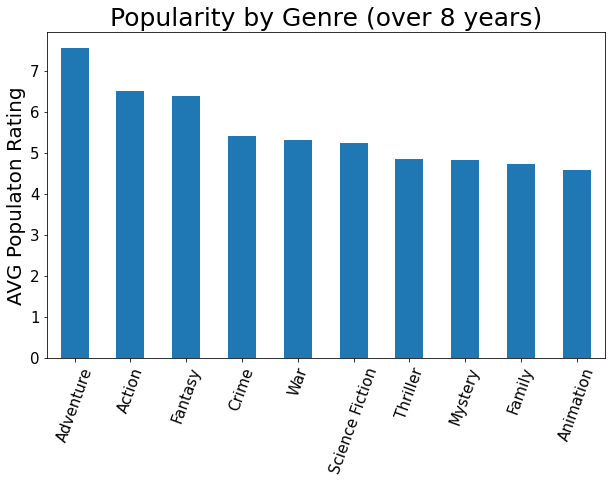

In [445]:
x = genres.index
y = genres.values
plt.figure(figsize=(10,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Popularity by Genre (over 8 years)", fontsize=25)
plt.ylabel("AVG Populaton Rating", fontsize=20)
ax= genres.plot.bar(x=x, y=y, rot=70)

fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)

plt.savefig('popularity_by_genre.png', facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches="tight")


In [ ]:
# There are two connections between the top 4: They are all Action/Science Fiction
genres = TMDB_genre.groupby('genre_ids')['popularity'].mean().sort_values(ascending=False).head(10)
genres